

# Project: Investigating whether a patient will turn up for an appointment

> I will be Investigating a hospital appointment Dataset! This dataset collects information from several medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

In [1]:
# importing statements for all of the packages that i will use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Loading data


In [2]:
#     loading csv file
appointment_df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

<a id='wrangling'></a>
## Data Wrangling

>  In this section of the report, I am checking for cleanliness, and then trim and clean my dataset for analysis.

### Checking General Properties

In [59]:
appointment_df.head(1)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,showed_up
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes


In [4]:
#  Checking the number of samples and columns in the  dataset

print(appointment_df.shape)

(110527, 14)


In [5]:
#  Checking whether there are duplicate rows in the dataset

appointment_df.duplicated().sum()

0

In [6]:
# Checking columns with missing data
appointment_df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
# Checking the datatypes for each feature
appointment_df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

<a id='wrangling'></a>
## My findings about the data



>  1. The encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
>  2. There is no duplicate rows in the dataset.
>  3. There is no null values in the dataset.


# Data Cleaning process

## 1.Dropping columns
> Here I will be dropping some columns that  I won't necessarily need for this data analysis process

In [8]:
# drop columns from the dataset

appointment_df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)


In [9]:
# confirm changes
appointment_df.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No




## 2. Renaming Columns

> For consistency in the dataset, I will be renaming  all column labels to replace hyphens(-) with underscores(_) and convert everything to lowercase since being consistent with lowercase and underscores  helps make column names easy to remember.

In [10]:
# converting every letter in the column title to lowercase
appointment_df.rename(columns=lambda x: x.strip().lower(), inplace=True)

# confirm changes
appointment_df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [11]:

# rename no-show to showed_up
appointment_df.rename(columns={'no-show': 'showed_up'}, inplace=True)

# confirm changes
appointment_df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [12]:

# rename hipertension to hypertension
appointment_df.rename(columns={'hipertension': 'hypertension'}, inplace=True)

# confirm changes
appointment_df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,showed_up
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [13]:

# rename scheduledday to scheduled_day
appointment_df.rename(columns={'scheduledday': 'scheduled_day'}, inplace=True)

# confirm changes
appointment_df.head(1)

,gender,scheduled_day,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,showed_up
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [14]:

# rename appointmentday to appointment_day
appointment_df.rename(columns={'appointmentday': 'appointment_day'}, inplace=True)

# confirm changes
appointment_df.head(4)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,showed_up
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No




## 3. Swapping the no_show column's values
>  The encoding of the last column displays ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up. I need to swap these values such that it displays 'yes' if the patient showed up.

In [15]:
#Swapping the showed_up column's values

appointment_df['showed_up'] = appointment_df['showed_up'].map(
{'Yes':'No', 'No':'Yes'})


In [16]:
# confirming changes
appointment_df.head(4)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,showed_up
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes




## 4. Saving the cleaned dataset

###  I am going to save the already  cleaned dataset as 'cleaned_df'

In [17]:
# save new dataset for the next section
appointment_df.to_csv('cleaned.csv', index=False)

# <a id='eda'></a>
##   5. Exploratory Data Analysis

> Now that I have trimmed and cleaned my data, I am going to Compute statistics and create visualizations with the goal of addressing the research questions.



In [18]:
#Loading the cleaned dataset for analysis

cleaned_appointment_df = pd.read_csv('cleaned.csv')

In [19]:
#
cleaned_appointment_df.head(2)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,showed_up
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes


### General statistics about the data distribution 
> This will help me understand the data a little bit more and even identify any changes I will need to make.

In [20]:
# Checking whether there could be a null value in the new dataset
cleaned_appointment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   gender           110527 non-null  object
 1   scheduled_day    110527 non-null  object
 2   appointment_day  110527 non-null  object
 3   age              110527 non-null  int64 
 4   neighbourhood    110527 non-null  object
 5   scholarship      110527 non-null  int64 
 6   hypertension     110527 non-null  int64 
 7   diabetes         110527 non-null  int64 
 8   alcoholism       110527 non-null  int64 
 9   handcap          110527 non-null  int64 
 10  sms_received     110527 non-null  int64 
 11  showed_up        110527 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


> The data set is clean without any null values in any of the columns' data

In [21]:
cleaned_appointment_df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [22]:
exp_df.hist(figsize=(15,10));

NameError: name 'exp_df' is not defined

> Age is skewed to the right with the majority number of patients between 37 to 55 years

### (i).  Is the age a factor that infuences the number of the patients.?
> Acording to the above statistical distribution, most of the patients' ages ranged between 37 to 55 years even though we had an entry of a patient with 115 years of age.

> Patients below 18 years of age happens to be rare.

>>>>cleaned_appointment_df.describe()

### (ii). How many patients turned up for the appointment in total ?

In [23]:
# Checking the counts of entries when the patients showed up against when they failed to show up

cleaned_appointment_df.showed_up.value_counts()


Yes    88208
No     22319
Name: showed_up, dtype: int64

> It is evident that a total of 88208 patients did turned up for the appointments against the 22319 who didnt turn up

### (iii). Is age assosiated with the patient failing to show up on appointment date?


> Here I will first convert the "yes" to True and the "no" to False

In [24]:
#Converting the "yes" value to True and the "no" to False

cleaned_appointment_df['showed_up'] = cleaned_appointment_df['showed_up'].map({'Yes':'True', 'No':'False'})


In [25]:
# Confirming the changes made

cleaned_appointment_df.head(1)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,showed_up
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,True


In [26]:
# save new dataset for the next section

cleaned_appointment_df.to_csv('exp.csv', index=False)

In [27]:
#  loading the exp.csv file

exp_df = pd.read_csv('exp.csv')

In [28]:
#  Confirming the first row of the dataset

exp_df.head(1)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,showed_up
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,True


In [29]:
# Here, i am creating masks of rows that had the patients who showed up and those that failed to show up

successful = exp_df.showed_up == True
failed = exp_df.showed_up == False

In [30]:
# finding the mean of the patients who showed up

exp_df.age[successful].mean()

37.790064393252315

In [31]:
# finding the mean of the patients who didn't showed up

exp_df.age[failed].mean()

34.31766656212196

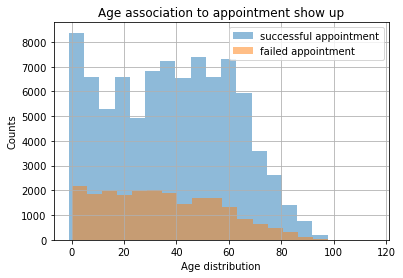

In [32]:
#The distribution affairs that involves age distribution and whether they showed up or failed

exp_df.age[successful].hist(alpha=0.5, bins=20, label='successful appointment')
exp_df.age[failed].hist(alpha=0.5, bins=20, label='failed appointment')
plt.legend()
plt.title('Age association to appointment show up')
plt.xlabel('Age distribution')
plt.ylabel('Counts');



> The patients who showed up for the appointment have a higher fairs than the patients who didn't show up.

In [33]:
exp_df.groupby('gender').showed_up.mean()

gender
F    0.796854
M    0.800321
Name: showed_up, dtype: float64

F    71840
M    38687
Name: gender, dtype: int64

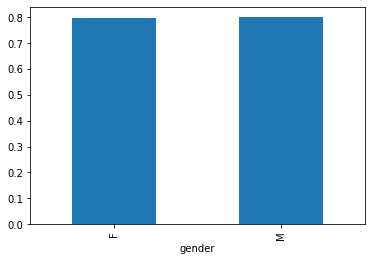

In [34]:
#To find the exact numbers of both the male and female patient population

exp_df.groupby('gender').showed_up.mean().plot(kind= 'bar');
exp_df.gender.value_counts()

> The female population is higher than that of the male patients

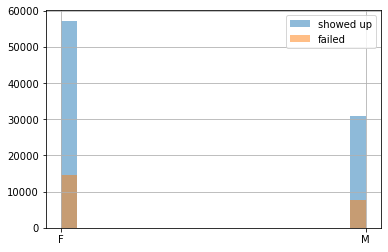

In [35]:
# Here i will be ploting the both genders differently to find a glimpse of the correlation

exp_df.gender[successful].hist(alpha=0.5, bins=20, label='showed up')
exp_df.gender[failed].hist(alpha=0.5, bins=20, label='failed')
plt.legend();

> The number of female patients who turned up for the appointment is more than that on the male population, The could be as a result of the lower number of the male patients in the dataset.

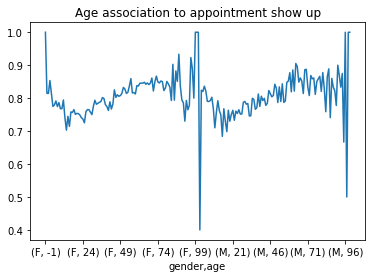

In [36]:
# Comparing the distribution of both genders' age in relation to showing up for appointment

exp_df.groupby('gender')['age'].value_counts()
exp_df.query('gender == "F"')['age'].median(), exp_df.query('gender == "M"')['age'].median()

exp_df.groupby(['gender', 'age']).showed_up.mean().plot(kind='line')
plt.title('Age association to appointment show up');


> The male and the female patterns across all ages have a very close correlation
> In both genders, the patients around 46 years of age are commiting to showing up, therefore giving me the answer that age is thus a factor that determines whether a patient will show up or not.

### (iv).  Do  patients  enrolled in Brasilian welfare program-'Bolsa Família' have a relation to them showing up for their appointments?

In [37]:
# finding the means  of the scholarship patients who showed up

exp_df.scholarship[successful].mean()

0.09390304734264465

In [38]:
# finding the mean of the non-scholarship patients who didn't showed up

exp_df.scholarship[failed].mean()

0.11550696715802679

In [39]:
# Number of patients who had scholaships against those who didnt had

exp_df.scholarship.value_counts()

0    99666
1    10861
Name: scholarship, dtype: int64

In [40]:
exp_df.groupby('scholarship').showed_up.mean()

scholarship
0    0.801928
1    0.762637
Name: showed_up, dtype: float64

The  patients with scholarships(Brasilian welfare program-'Bolsa Família') exhibit closely related trend of showing up in relation to those without which tends to have a slightly higher rates of showing up.

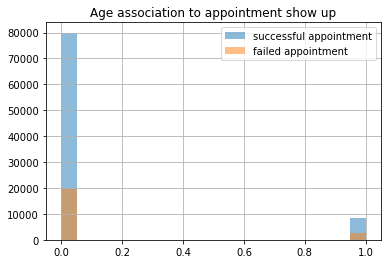

In [41]:
#The distribution affairs that involves patients enrolled to scholarship(Brasilian welfare program-'Bolsa Família')  and whether they showed up or failed

exp_df.scholarship[successful].hist(alpha=0.5, bins=20, label='successful appointment')
exp_df.scholarship[failed].hist(alpha=0.5, bins=20, label='failed appointment')
plt.legend()
plt.title('Age association to appointment show up');




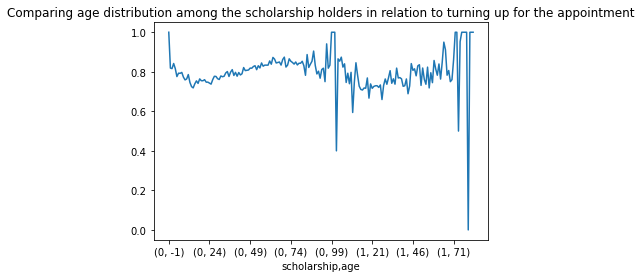

In [42]:
# Comparing the distribution of both genders' age in relation to showing up for appointment

exp_df.groupby('scholarship')['age'].value_counts()
exp_df.query('scholarship')['age'].median()

exp_df.groupby(['scholarship', 'age']).showed_up.mean().plot(kind='line')
plt.title('Comparing age distribution among the scholarship holders in relation to turning up for the appointment');

> There has been no major relation between the patients who have enrolled to Bolsa Família scholarship program to showing up for the appointment.

### (v). Do the patients who receive sms messages have a higher chance of showing up for their appointment?

In [43]:
# finding the mean of the patients who showed up

exp_df.sms_received[successful].mean()

0.2913341193542536

In [44]:
# finding the mean of the patients who didn't showed up

exp_df.sms_received[failed].mean()

0.43837089475334917

In [45]:
# Number of patients who received sms message against the ones that didn't receive and sms

exp_df.sms_received.value_counts()

0    75045
1    35482
Name: sms_received, dtype: int64

In [46]:
exp_df.groupby('showed_up').sms_received.mean()

showed_up
False    0.438371
True     0.291334
Name: sms_received, dtype: float64

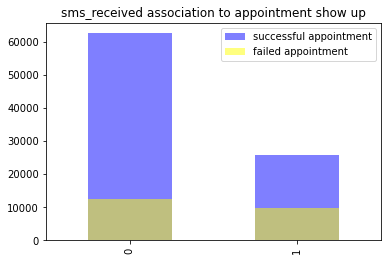

In [47]:

#The distribution affairs that involves patients that receiv5ed sms and whether they showed up or failed
exp_df.sms_received[successful].value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='successful appointment')
exp_df.sms_received[failed].value_counts().plot(kind='bar',alpha=0.5, color= 'yellow', label='failed appointment')
plt.legend()
plt.title('sms_received association to appointment show up');


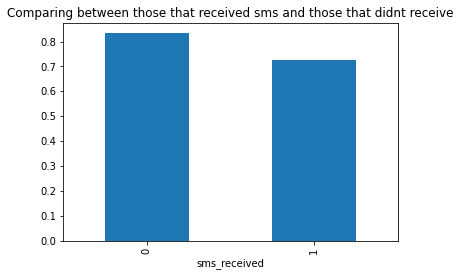

In [48]:

exp_df.groupby(['sms_received']).showed_up.mean().plot(kind='bar')
plt.title('Comparing between those that received sms and those that didnt receive');

> Despite the number of patients who received sms being generally low, we have a higher number of patients who didn't receive sms and did showed up compared to those that received the sms.

### (vi).  How do hypertension patients relate to showing up 

In [49]:
# finding the mean of the patients who showed up

exp_df.hypertension[successful].mean()

0.20439189189189189

In [50]:
# finding the mean of the patients who showed up

exp_df.hypertension[failed].mean()

0.16900398763385457

In [51]:
exp_df.hypertension.value_counts()

0    88726
1    21801
Name: hypertension, dtype: int64

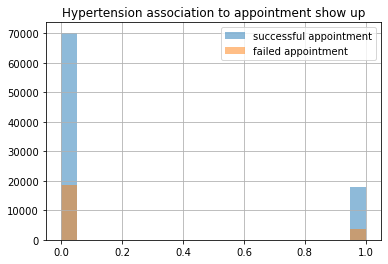

In [52]:
#The distribution affairs that involves patients enrolled to scholarship(Brasilian welfare program-'Bolsa Família')  and whether they showed up or failed

exp_df.hypertension[successful].hist(alpha=0.5, bins=20, label='successful appointment')
exp_df.hypertension[failed].hist(alpha=0.5, bins=20, label='failed appointment')
plt.legend()
plt.title('Hypertension association to appointment show up');




By finding the means of hypertension patients that showed up and that for the hypertension patients that didnt show up, we noticed that the hypertension patients had a higher chance of showing up compared to those that didnt shoow up.

#### Using functions

In [53]:
# Here I will be creating masks for rows where the patients showed up and rows where the patients failed to show up.

showed = exp_df['showed_up'] == True
failed = exp_df['showed_up'] == False

In [54]:
# Creationg histogram function

def histogram(column):
    exp_df[column][showed].hist(alpha=0.5, label='Showed up')
    exp_df[column][failed].hist(alpha=0.5, label='Failed to show up')
    plt.legend();

In [55]:
# function to  print out the means of each features

def means(column):
    print(df.groupby(column)['showed_up'].mean())
    exp_df.groupby(column)['showed_up'].mean().plot(kind='bar');

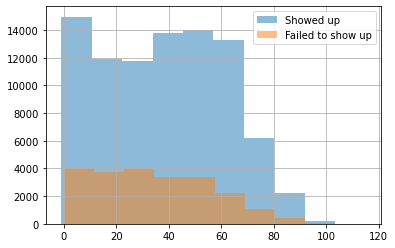

In [57]:
histogram('age')

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,showed_up
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,True
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,True
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,True
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,True
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,True
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,True
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,True
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,True


> The patients having ages about 37 to 58 years old seem to have a higher tendancy to show up for their scheduled appointments.

<a id='conclusions'></a>
## 6. Limitation


> I feel that there should be a specification column on what type of health issue each and every patient was/ is  suffering from.

<a id='conclusions'></a>
## 7. Conclusions

> Among the factors that influence whether a patient will show up or not is patients' age.  Both male and female patients between 40 and 60 years had a higher chance of showing up for their appointment.


> Patients with hypertension conditions had a higher possibility of showing up for their appointment.
